# Boston Price

## Data Load

In [31]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [32]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(test_data))

404
102


In [34]:
# 전처리

mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data -= mean
train_data /= std

test_data -= mean
test_data /= std

## Modeling

### Baseline

In [35]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mae'])

In [36]:
history = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=32,
                    validation_data=(test_data, test_labels))

Epoch 1/20
13/13 [==============================] - 0s 7ms/step - loss: 525.9575 - mae: 20.9911 - val_loss: 496.0617 - val_mae: 20.3408
Epoch 2/20
13/13 [==============================] - 0s 2ms/step - loss: 422.4163 - mae: 18.4102 - val_loss: 387.5907 - val_mae: 17.5545
Epoch 3/20
13/13 [==============================] - 0s 2ms/step - loss: 315.6923 - mae: 15.5031 - val_loss: 276.8367 - val_mae: 14.5231
Epoch 4/20
13/13 [==============================] - 0s 2ms/step - loss: 216.7819 - mae: 12.3173 - val_loss: 186.5167 - val_mae: 11.6686
Epoch 5/20
13/13 [==============================] - 0s 2ms/step - loss: 138.8999 - mae: 9.5415 - val_loss: 118.7496 - val_mae: 9.2179
Epoch 6/20
13/13 [==============================] - 0s 2ms/step - loss: 88.8156 - mae: 7.4256 - val_loss: 80.7425 - val_mae: 7.3245
Epoch 7/20
13/13 [==============================] - 0s 2ms/step - loss: 60.9816 - mae: 6.0141 - val_loss: 59.5809 - val_mae: 6.0453
Epoch 8/20
13/13 [==============================] - 0s 2ms

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/2102177999.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


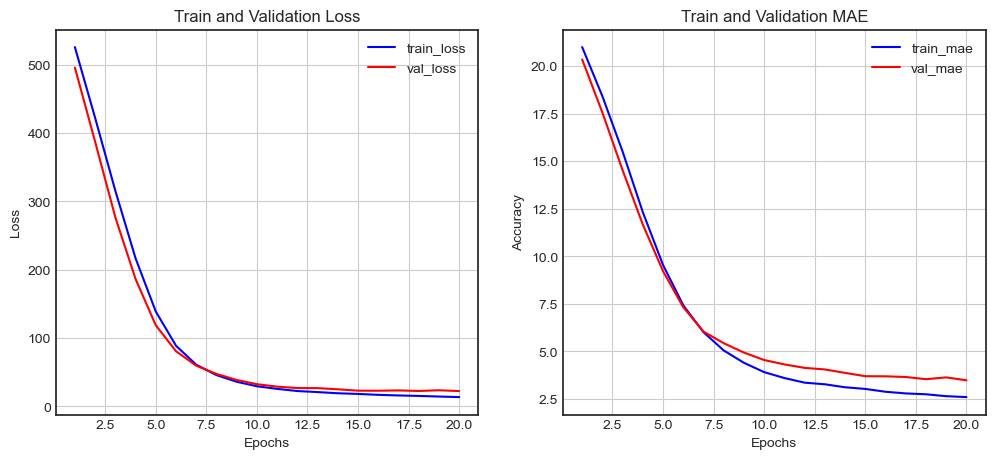

In [37]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()                                      
ax2.legend()

plt.show()

In [38]:
# 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 22.4381 - mae: 3.4870


Baseline 모델도 기본적으로 높은 성능을 보여주고 있습니다.

### Attempt

- Dense : 68 -> 128 ()
- epochs : 20 -> 50
- optimizer : rmsprop -> Adam(lr=0.001)

optimizer를 Adam으로 변경,
Dense를 128로 늘린 후 과적합을 방지하기 위해 학습률을 낮춤과 동시에 epochs를 50까지로 높여 시도해보겠습니다.

In [40]:
from keras import models, layers, optimizers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(train_data.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1))

optimizer = optimizers.Adam(lr=0.001)

model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['mae'])

history = model.fit(train_data, train_labels,
                    epochs=50,
                    batch_size=32,
                    validation_data=(test_data, test_labels))

Epoch 1/50
13/13 [==============================] - 0s 7ms/step - loss: 548.2900 - mae: 21.5719 - val_loss: 524.7319 - val_mae: 21.0951
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 448.3035 - mae: 19.2019 - val_loss: 401.9748 - val_mae: 18.0482
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 311.4937 - mae: 15.4939 - val_loss: 236.8457 - val_mae: 13.3433
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 159.1728 - mae: 10.2169 - val_loss: 102.0086 - val_mae: 8.3635
Epoch 5/50
13/13 [==============================] - 0s 3ms/step - loss: 72.1879 - mae: 6.5459 - val_loss: 66.3499 - val_mae: 6.3321
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 50.5811 - mae: 5.3160 - val_loss: 46.3343 - val_mae: 5.3273
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 32.8642 - mae: 4.1815 - val_loss: 35.6546 - val_mae: 4.6277
Epoch 8/50
13/13 [==============================] - 0s 2ms/st

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/2102177999.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


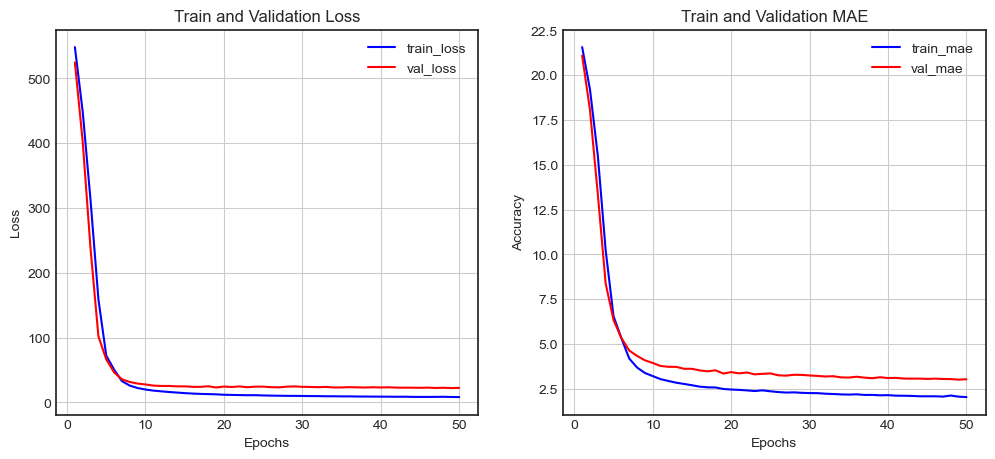

In [41]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae 시각화
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()                                      
ax2.legend()

plt.show()

In [42]:
# 모델 평가
test_loss, test_mae = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 1ms/step - loss: 22.4100 - mae: 3.0245


loss는 큰 차이 없지만 기본 모델보다는 15% 정도 성능을 높일 수 있었습니다.

# Reuters

## Data Load

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [45]:
#  Reuters 데이터셋
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

# val 데이터 25% 분리
val_data = train_data[:int(len(train_data) * 0.25)]
val_labels = train_labels[:int(len(train_labels) * 0.25)]
train_data = train_data[int(len(train_data) * 0.25):]
train_labels = train_labels[int(len(train_labels) * 0.25):]

print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6737
2245
2246
46


In [46]:
# 데이터 원-핫 인코딩
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

train_data = one_hot_encoding(train_data)
val_data = one_hot_encoding(val_data)
test_data = one_hot_encoding(test_data)

# label 범주형 형태로 변환
from tensorflow.keras import utils

train_labels = utils.to_categorical(train_labels)
val_labels = utils.to_categorical(val_labels)
test_labels = utils.to_categorical(test_labels)

## Modeling

### Baseline

In [58]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.Dense(64, activation='relu', name='hidden'))
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
history = model.fit(train_data, train_labels, batch_size=32, epochs=20, validation_data=(val_data, val_labels))

Epoch 1/20
211/211 [==============================] - 1s 4ms/step - loss: 1.5515 - accuracy: 0.6650 - val_loss: 1.1719 - val_accuracy: 0.7519
Epoch 2/20
211/211 [==============================] - 1s 3ms/step - loss: 0.8074 - accuracy: 0.8234 - val_loss: 1.0146 - val_accuracy: 0.7835
Epoch 3/20
211/211 [==============================] - 1s 3ms/step - loss: 0.5120 - accuracy: 0.8857 - val_loss: 0.9858 - val_accuracy: 0.7978
Epoch 4/20
211/211 [==============================] - 1s 3ms/step - loss: 0.3448 - accuracy: 0.9259 - val_loss: 1.0108 - val_accuracy: 0.8067
Epoch 5/20
211/211 [==============================] - 1s 3ms/step - loss: 0.2498 - accuracy: 0.9449 - val_loss: 1.0999 - val_accuracy: 0.8049
Epoch 6/20
211/211 [==============================] - 1s 3ms/step - loss: 0.2089 - accuracy: 0.9524 - val_loss: 1.2081 - val_accuracy: 0.7911
Epoch 7/20
211/211 [==============================] - 1s 3ms/step - loss: 0.1783 - accuracy: 0.9570 - val_loss: 1.3165 - val_accuracy: 0.7947
Epoch 

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


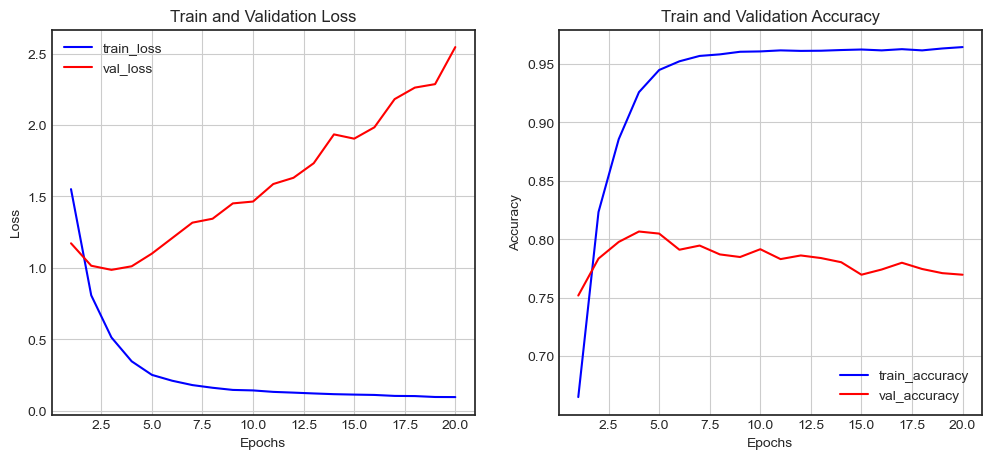

In [60]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [61]:
test_loss, test_mae = model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 854us/step - loss: 2.8073 - accuracy: 0.7578


val_loss가 점차 높아지며 과적합인 것으로 보여지지만 accuracy는 0.75로 높은 성능을 보이고 있습니다.

### Attempt

- Dense : 64 -> 128
- BatchNormalization
- Dropout : 0.5

BatchNormalization과 Dropout을 적용하여 빠르게 학습하면서 과대적합을 방지하지만 성능이 낮아지지 않도록 Dense를 2배 높여보았습니다.

In [47]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000, ), name='input'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5)) # Dropout 적용
model.add(layers.Dense(128, activation='relu', name='hidden'))
model.add(layers.BatchNormalization()) # BatchNormalization 적용
model.add(layers.Dropout(0.5)) # Dropout 적용
model.add(layers.Dense(46, activation='softmax', name='output'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [48]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 128)               1280128   
                                                                 
 batch_normalization_2 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 hidden (Dense)              (None, 128)               16512     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 128)             

In [49]:
# ModelCheckpoint와 EarlyStopping 적용
from keras.callbacks import ModelCheckpoint, EarlyStopping


model_checkpoint = ModelCheckpoint(filepath='best_model.h5', save_best_only=True, monitor='val_loss')
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(train_data, train_labels, batch_size=32, epochs=50, validation_data=(val_data, val_labels),callbacks=[model_checkpoint, early_stopping])

Epoch 1/50
211/211 [==============================] - 2s 6ms/step - loss: 2.1135 - accuracy: 0.5706 - val_loss: 1.4248 - val_accuracy: 0.6989
Epoch 2/50
 24/211 [==>...........................] - ETA: 0s - loss: 1.2271 - accuracy: 0.7513

/Users/yangdong-yeong/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


211/211 [==============================] - 1s 5ms/step - loss: 1.2527 - accuracy: 0.7321 - val_loss: 1.1231 - val_accuracy: 0.7621
Epoch 3/50
211/211 [==============================] - 1s 5ms/step - loss: 0.9816 - accuracy: 0.7852 - val_loss: 1.0776 - val_accuracy: 0.7849
Epoch 4/50
211/211 [==============================] - 1s 5ms/step - loss: 0.8054 - accuracy: 0.8156 - val_loss: 1.0484 - val_accuracy: 0.7924
Epoch 5/50
211/211 [==============================] - 1s 4ms/step - loss: 0.7002 - accuracy: 0.8333 - val_loss: 1.0197 - val_accuracy: 0.8000
Epoch 6/50
211/211 [==============================] - 1s 4ms/step - loss: 0.6163 - accuracy: 0.8525 - val_loss: 0.9930 - val_accuracy: 0.8058
Epoch 7/50
211/211 [==============================] - 1s 5ms/step - loss: 0.5426 - accuracy: 0.8712 - val_loss: 0.9827 - val_accuracy: 0.8071
Epoch 8/50
211/211 [==============================] - 1s 4ms/step - loss: 0.5075 - accuracy: 0.8793 - val_loss: 0.9891 - val_accuracy: 0.8071
Epoch 9/50
211/21

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/1201330491.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


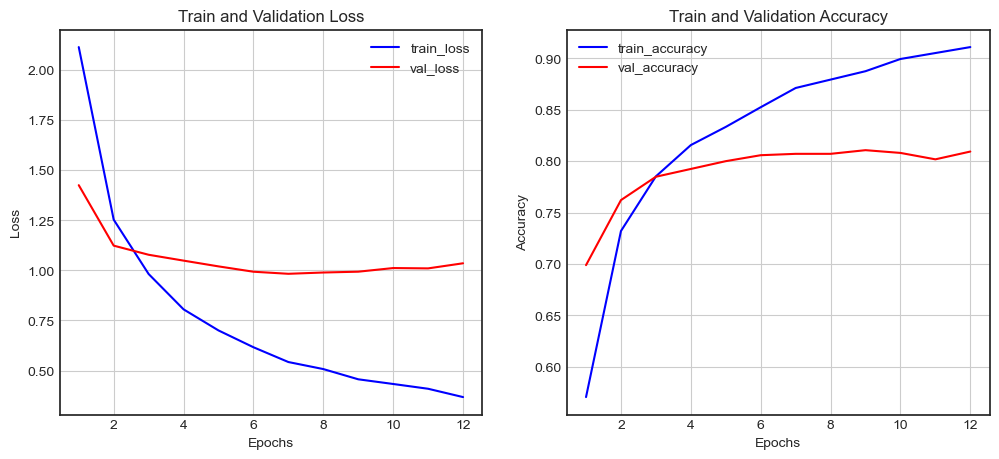

In [50]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [51]:
test_loss, test_mae = model.evaluate(test_data, test_labels)

71/71 [==============================] - 0s 1ms/step - loss: 1.0709 - accuracy: 0.7974


val_loss는 확안하게 과적합이 안정화 되었고 accuracy는 5% 상승하였습니다.

# CIFAR10

## Data Load

In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [16]:
# CIFAR-10 데이터셋 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

from sklearn.model_selection import train_test_split

# 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [17]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/2355943253.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


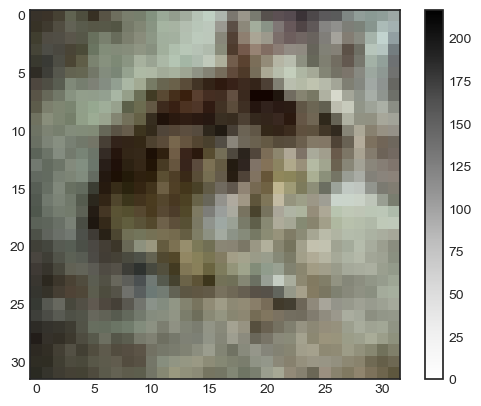

In [18]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [19]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [20]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Modeling

### Baseline

In [62]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Dropout


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [63]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_8 (Flatten)         (None, 1024)            

In [64]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    validation_data=(x_val, y_val))

Epoch 1/10
1250/1250 [==============================] - 12s 9ms/step - loss: 1.5819 - accuracy: 0.4210 - val_loss: 1.3624 - val_accuracy: 0.5131
Epoch 2/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.2079 - accuracy: 0.5696 - val_loss: 1.1243 - val_accuracy: 0.5992
Epoch 3/10
1250/1250 [==============================] - 11s 9ms/step - loss: 1.0605 - accuracy: 0.6235 - val_loss: 1.1147 - val_accuracy: 0.6083
Epoch 4/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.9564 - accuracy: 0.6640 - val_loss: 0.9750 - val_accuracy: 0.6521
Epoch 5/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8821 - accuracy: 0.6900 - val_loss: 0.9824 - val_accuracy: 0.6573
Epoch 6/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.8138 - accuracy: 0.7132 - val_loss: 0.9129 - val_accuracy: 0.6744
Epoch 7/10
1250/1250 [==============================] - 11s 9ms/step - loss: 0.7617 - accuracy: 0.7319 - val_loss: 0.9003 - val_ac

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


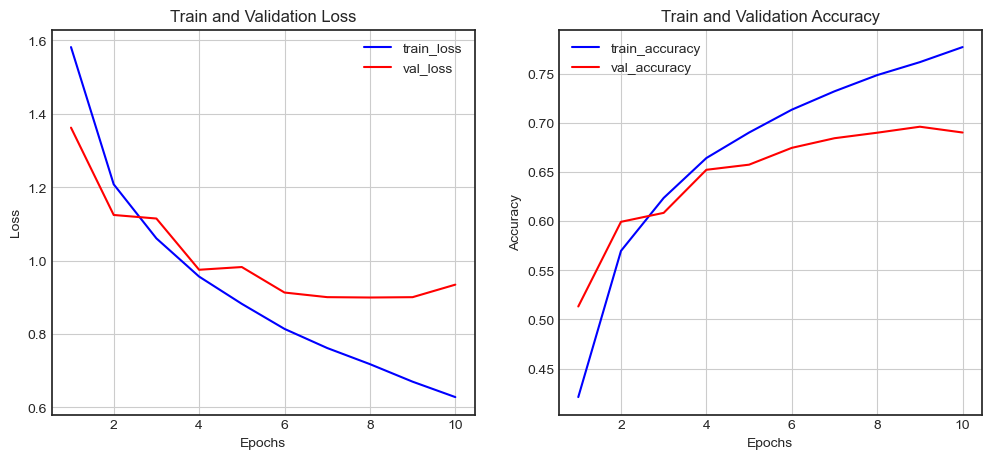

In [65]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [66]:
# 테스트 데이터셋을 이용해 모델을 평가합니다.
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.9358 - accuracy: 0.6931


[0.9357711672782898, 0.6930999755859375]

### Attempt

- Convolution : 32 -> 64 -> 128 점차 증가
- Dropout : 0.5
- Dense : 64 -> 128
- BatchNormalization 추가

깊이가 깊어질수록 더 많은 패턴을 얻을 수 있도록 filter를 점차 증가 후
위 데이터셋과 동일한 시도를 추가하였습니다.

In [67]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
history = model.fit(x_train, y_train,
                    epochs=30,
                    validation_data=(x_val, y_val))

Epoch 1/30
1250/1250 [==============================] - 16s 12ms/step - loss: 1.5243 - accuracy: 0.4573 - val_loss: 1.2226 - val_accuracy: 0.5579
Epoch 2/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.1785 - accuracy: 0.5804 - val_loss: 1.0566 - val_accuracy: 0.6252
Epoch 3/30
1250/1250 [==============================] - 15s 12ms/step - loss: 1.0433 - accuracy: 0.6328 - val_loss: 0.9765 - val_accuracy: 0.6463
Epoch 4/30
1250/1250 [==============================] - 15s 12ms/step - loss: 0.9547 - accuracy: 0.6676 - val_loss: 1.0145 - val_accuracy: 0.6452
Epoch 5/30
1250/1250 [==============================] - 15s 12ms/step - loss: 0.8934 - accuracy: 0.6863 - val_loss: 1.0485 - val_accuracy: 0.6282
Epoch 6/30
1250/1250 [==============================] - 16s 12ms/step - loss: 0.8344 - accuracy: 0.7073 - val_loss: 0.9582 - val_accuracy: 0.6665
Epoch 7/30
1250/1250 [==============================] - 15s 12ms/step - loss: 0.7925 - accuracy: 0.7230 - val_loss: 0.9152 -

/var/folders/h0/rz02629x2b535_x0qf1h70zm0000gn/T/ipykernel_3710/237002889.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


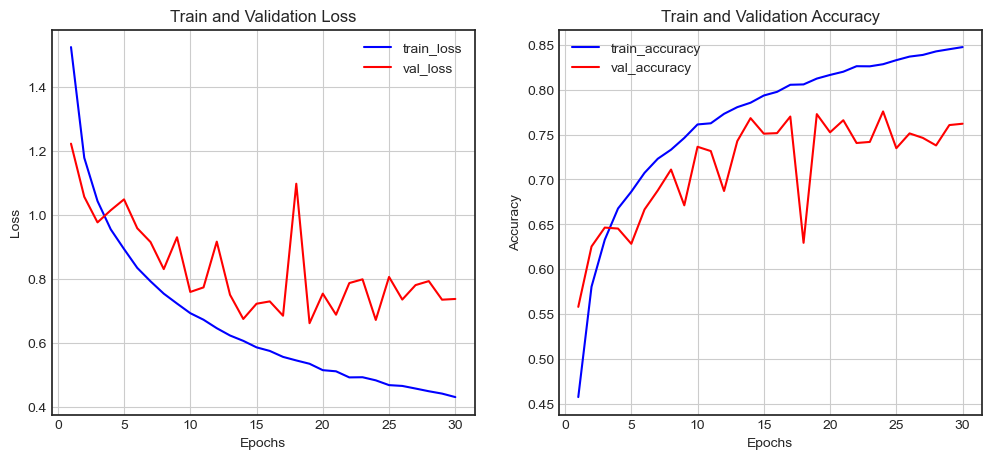

In [69]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [70]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.7404 - accuracy: 0.7638


[0.7404100298881531, 0.7638000249862671]

accuracy는 10% 상승하는 효과가 있었지만 loss와 accuracy의 편차가 불규칙해져 조금은 아쉬운 결과를 보였습니다.

# Retrospective

다양한 데이터셋을 다루며 배웠던 내용들을 정리하며 Baseline보다는 조금씩 성능을 향상시켰지만 <br/>
Baseline이 기본적으로 좋은 성능을 보여주고 있어 다양한 시도를 하였음에도 드라마틱하게 성능을 높이기는 어려웠던 것 같다. <br/>
<br/>
현업 데이터를 활용할 때는 적어도 95%의 성능을 보여야 사용할 수 있지 않을까라는 생각이 들어 현업에서는 딥러닝을 어떻게 활용하는지 찾아봐야겠다.